    Implement a KNN model to classify the animals into categories.

### Importing the Required Libraries 

In [1]:
# Importing the basic libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# importing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
zoo = pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


### Performing EDA on the data

In [3]:
# to get the information of the datafile
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
# summarizing the datafile
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
# to check the null values of the data
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
print("Dimensions -",zoo.shape)
print("Column names -",zoo.columns)

Dimensions - (101, 18)
Column names - Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


In [7]:
# summarising the information using crosstab
pd.crosstab(zoo['legs'],zoo['type'])

type,1,2,3,4,5,6,7
legs,,,,,,,
0,3,0,3,13,0,0,4
2,7,20,0,0,0,0,0
4,31,0,2,0,4,0,1
5,0,0,0,0,0,0,1
6,0,0,0,0,0,8,2
8,0,0,0,0,0,0,2


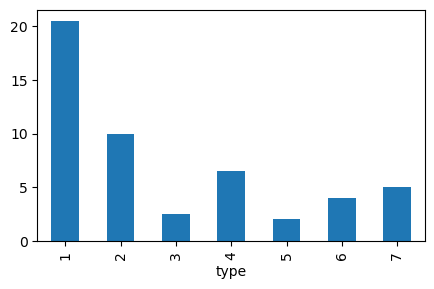

In [8]:
# Plotting barplot using crosstab function
plt.figure(figsize=(5,3))
pd.crosstab(zoo['hair'],zoo['type']).mean().plot(kind='bar');

In [9]:
# to check the number of duplicates present in the data
zoo[zoo.duplicated()].sum()

animal name    0.0
hair           0.0
feathers       0.0
eggs           0.0
milk           0.0
airborne       0.0
aquatic        0.0
predator       0.0
toothed        0.0
backbone       0.0
breathes       0.0
venomous       0.0
fins           0.0
legs           0.0
tail           0.0
domestic       0.0
catsize        0.0
type           0.0
dtype: float64

### Train and Test Split
    Splitting the data into Train and Test data

In [10]:
X = zoo.iloc[:,1:17]
y = zoo.iloc[:,17]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

### Grid Search Algorithm for Tuning

In [12]:
from sklearn.model_selection import GridSearchCV
# Creating array of integers from 1 to 39
n_neigh = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neigh)

In [13]:
# Instantiate a K-Nearest Neighbors classifier
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [14]:
# to print best score
print(grid.best_score_)
# to print best parameter
print(grid.best_params_)

0.97
{'n_neighbors': 1}


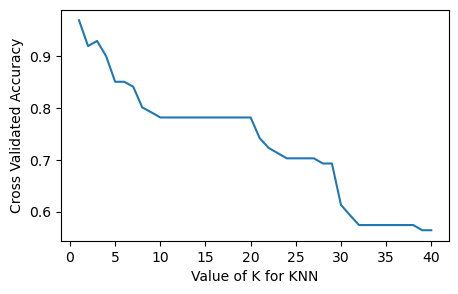

In [15]:
# Visualizing the accuracies of different K values
# Choose k between 1 - 41
k_range = range(1,41)
k_scores = []
# to calculate different k in models using iteration
# then returning the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
#plotting
plt.figure(figsize=(5,3))
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross Validated Accuracy")
plt.show()

### Builiding the Model
    Using K - Nearest Neighbors 

In [16]:
# Fitting the K - Nearest Neighbors model
Knn = KNeighborsClassifier(n_neighbors=1)
Knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
# to get the predictions
pred = Knn.predict(X_test)
pred

array([1, 1, 2, 2, 1, 1, 1, 4, 2, 6, 6, 6, 1, 1, 1, 7, 7, 4, 1, 4, 2, 1,
       3, 1, 4, 1, 7, 1, 1, 2, 1, 1, 2, 6], dtype=int64)

In [18]:
# Confusion matrix for accuracy testing
confusion_matrix(y_test, pred)

array([[16,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [19]:
# to get the accuracy score
accuracy = accuracy_score(y_test, pred)
print((accuracy)*100)

94.11764705882352


In [20]:
print("The accuracy of the KNN classifier on test data is {:.2f}".format(Knn.score(X_test, y_test)*100))

The accuracy of the KNN classifier on test data is 94.12
